In [ ]:
import pandas as pd

# Load Excel file
file_path = 'SU_WLAX_2024_2025_Stats.xlsx'
excel_file = pd.ExcelFile(file_path)

1. Games played: 2024 = 22, 2025 = 19


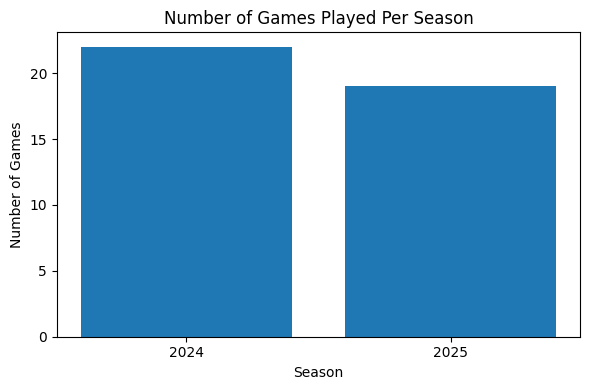

In [3]:
# 1. How many games did SU Women’s Lacrosse play in 2024 and 2025?
season_summary = excel_file.parse('Season_Summary')
games_2024 = season_summary.loc[season_summary['Year'] == 2024, 'Games'].values[0]
games_2025 = season_summary.loc[season_summary['Year'] == 2025, 'Games'].values[0]
print(f"1. Games played: 2024 = {games_2024}, 2025 = {games_2025}")

import matplotlib.pyplot as plt

years = season_summary['Year']
games = season_summary['Games']

plt.figure(figsize=(6, 4))
plt.bar(years.astype(str), games)
plt.title('Number of Games Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()


2. 2024 record: 16 Wins, 6 Losses
   2025 record: 10 Wins, 9 Losses


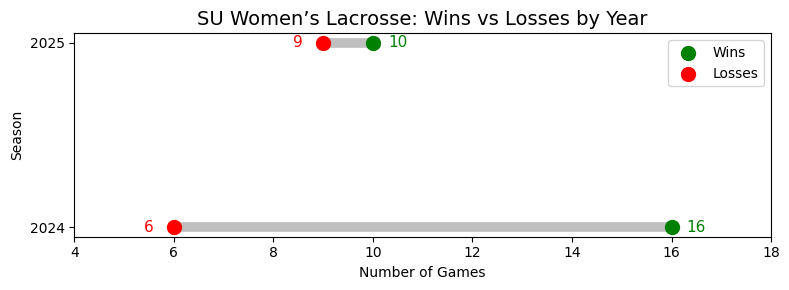

In [8]:

# 2. What was SU’s win-loss record for 2024 and 2025?
wins_2024 = season_summary.loc[season_summary['Year'] == 2024, 'Wins'].values[0]
losses_2024 = season_summary.loc[season_summary['Year'] == 2024, 'Losses'].values[0]
wins_2025 = season_summary.loc[season_summary['Year'] == 2025, 'Wins'].values[0]
losses_2025 = season_summary.loc[season_summary['Year'] == 2025, 'Losses'].values[0]
print(f"2. 2024 record: {wins_2024} Wins, {losses_2024} Losses")
print(f"   2025 record: {wins_2025} Wins, {losses_2025} Losses")

plt.figure(figsize=(8,3))
plt.hlines(y=years, xmin=losses, xmax=wins, color='gray', alpha=0.5, linewidth=7)
plt.scatter(wins, years, color='green', label='Wins', s=100, zorder=3)
plt.scatter(losses, years, color='red', label='Losses', s=100, zorder=3)

for i in range(len(years)):
    plt.text(wins[i]+0.3, years[i], str(wins[i]), va='center', color='green', fontsize=11)
    plt.text(losses[i]-0.6, years[i], str(losses[i]), va='center', color='red', fontsize=11)

plt.title("SU Women’s Lacrosse: Wins vs Losses by Year", fontsize=14)
plt.xlabel("Number of Games")
plt.ylabel("Season")
plt.legend()
plt.xlim(min(losses)-2, max(wins)+2)
plt.tight_layout()
plt.show()




3. 2024 Home: 9-2 (81.8%), Away: 5-2 (71.4%)
   SU performed better at home.


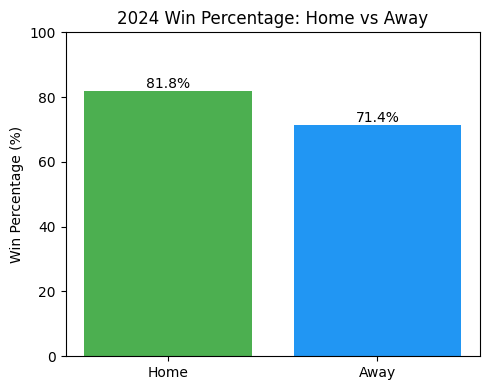

In [10]:
# 3. Did SU perform better at home or away in 2024, based on win percentage?
def win_loss_ratio(record_str):
    wins, losses = [int(x) for x in record_str.split('-')]
    return wins, losses, wins / (wins + losses)

home_record_2024 = season_summary.loc[season_summary['Year'] == 2024, 'Home'].values[0]
away_record_2024 = season_summary.loc[season_summary['Year'] == 2024, 'Away'].values[0]
home_wins, home_losses, home_win_pct = win_loss_ratio(home_record_2024)
away_wins, away_losses, away_win_pct = win_loss_ratio(away_record_2024)
print(f"3. 2024 Home: {home_wins}-{home_losses} ({home_win_pct:.1%}), Away: {away_wins}-{away_losses} ({away_win_pct:.1%})")
if home_win_pct > away_win_pct:
    print("   SU performed better at home.")
else:
    print("   SU performed better away.")

import matplotlib.pyplot as plt

labels = ['Home', 'Away']
win_pcts = [home_win_pct*100, away_win_pct*100]

plt.figure(figsize=(5,4))
plt.bar(labels, win_pcts, color=['#4CAF50', '#2196F3'])
plt.ylabel('Win Percentage (%)')
plt.title('2024 Win Percentage: Home vs Away')
plt.ylim(0, 100)
for i, v in enumerate(win_pcts):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', color='black')
plt.tight_layout()
plt.show()


4. Toughest opponent in 2024: Boston College on Apr 28 (Neutral) - SU lost 8-15 (Margin: -7)


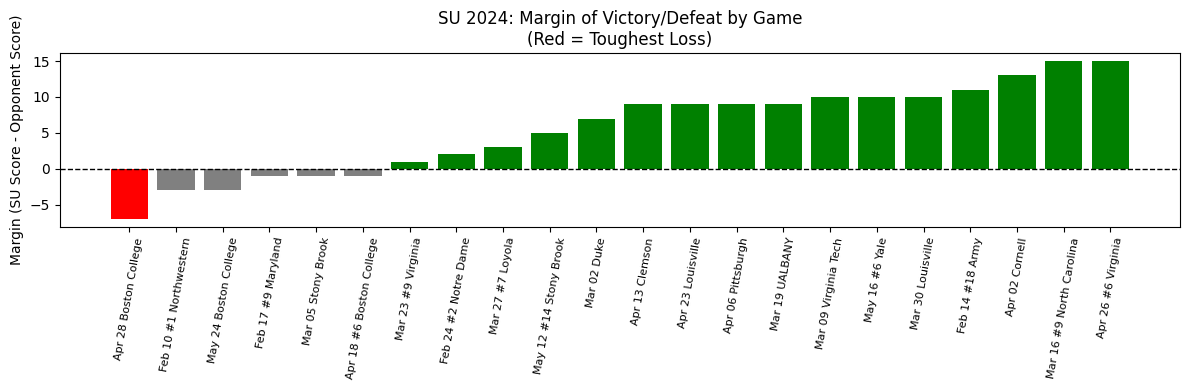

In [13]:
# 4. Who was SU’s toughest opponent in 2024, based on the largest margin of defeat?
games = excel_file.parse('Game_by_Game')
games_2024 = games[games['Year'] == 2024].copy()
games_2024['Margin'] = games_2024['SU Score'] - games_2024['Opp Score']
toughest_loss = games_2024.sort_values('Margin').iloc[0]
print(f"4. Toughest opponent in 2024: {toughest_loss['Opponent']} on {toughest_loss['Date']} ({toughest_loss['Location']}) - SU lost {toughest_loss['SU Score']}-{toughest_loss['Opp Score']} (Margin: {toughest_loss['Margin']})")

import matplotlib.pyplot as plt

# Sort games for clearer plot (by date or margin, here by margin for drama)
sorted_games = games_2024.sort_values('Margin')
colors = ['red' if i == sorted_games['Margin'].idxmin() else ('green' if m > 0 else 'gray')
          for i, m in zip(sorted_games.index, sorted_games['Margin'])]

plt.figure(figsize=(12, 4))
plt.bar(
    sorted_games['Date'] + " " + sorted_games['Opponent'],
    sorted_games['Margin'],
    color=colors
)
plt.xticks(rotation=80, fontsize=8)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Margin (SU Score - Opponent Score)')
plt.title('SU 2024: Margin of Victory/Defeat by Game\n(Red = Toughest Loss)')
plt.tight_layout()
plt.show()



5. Highest attended home game in 2024: #9 North Carolina on Mar 16 - Attendance: 2982, Result: SU 20-5 (W)


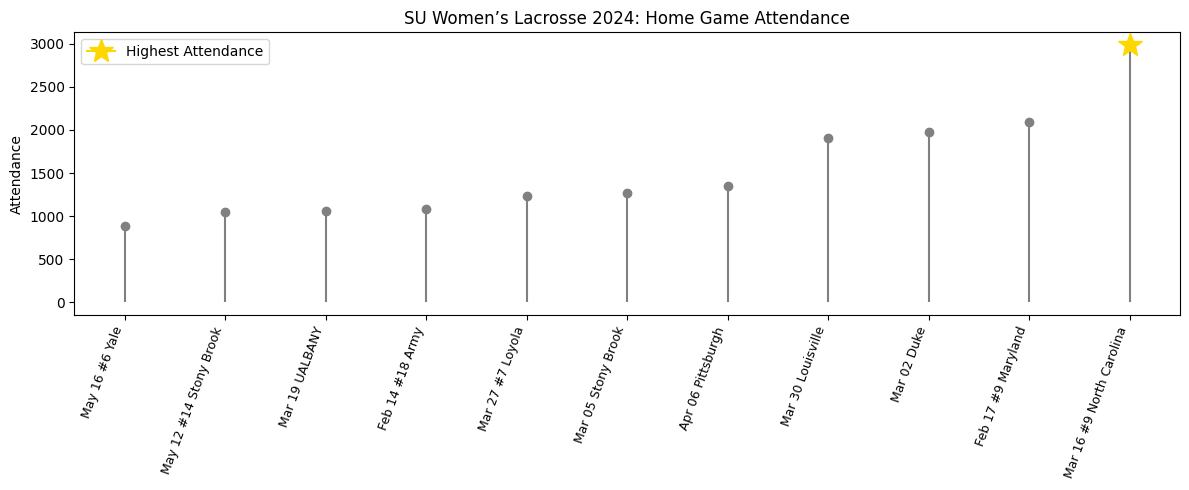

In [18]:
# 5. Which 2024 home game had the highest attendance, and what was the outcome?
home_games_2024 = games_2024[games_2024['Location'] == 'Home']
max_attendance_row = home_games_2024.loc[home_games_2024['Attendance'].idxmax()]
print(f"5. Highest attended home game in 2024: {max_attendance_row['Opponent']} on {max_attendance_row['Date']} - Attendance: {max_attendance_row['Attendance']}, Result: SU {max_attendance_row['SU Score']}-{max_attendance_row['Opp Score']} ({max_attendance_row['Result']})")

import matplotlib.pyplot as plt

# Sort home games by attendance (ascending)
sorted_home = home_games_2024.sort_values('Attendance')
game_labels = sorted_home['Date'] + " " + sorted_home['Opponent']

plt.figure(figsize=(12, 5))
plt.stem(
    game_labels,
    sorted_home['Attendance'],
    linefmt='grey',
    markerfmt='o',
    basefmt=' '
)
# Highlight the max attendance point (last one in sorted list)
plt.plot(
    game_labels.iloc[-1],
    sorted_home['Attendance'].iloc[-1],
    marker='*',
    markersize=18,
    color='gold',
    label='Highest Attendance'
)
plt.xticks(rotation=70, ha='right', fontsize=9)
plt.ylabel("Attendance")
plt.title("SU Women’s Lacrosse 2024: Home Game Attendance")
plt.legend()
plt.tight_layout()
plt.show()


6. Offense (Goals/Game): 2024 = 15.23, 2025 = 12.37
   Defense (Opp Goals/Game): 2024 = 9.68, 2025 = 11.63
   Both offense and defense worsened in 2025. Consider focusing on offense, as goals/game dropped more sharply.


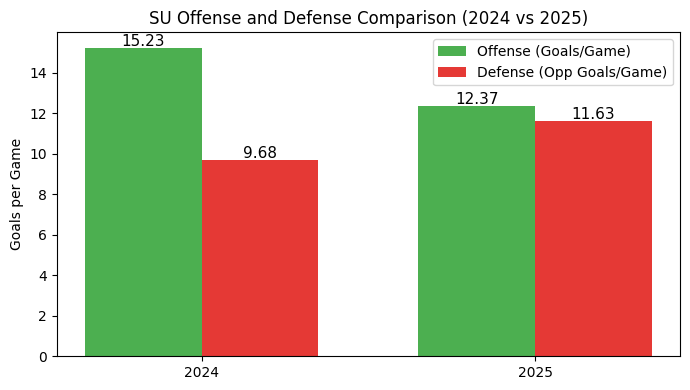

In [22]:
# 6. If coach wants 2 more wins, focus on offense or defense?
team_stats = excel_file.parse('Team_Stats')
offense_2024 = team_stats.loc[team_stats['Year'] == 2024, 'Goals/Game'].values[0]
defense_2024 = team_stats.loc[team_stats['Year'] == 2024, 'Opp Goals/Game'].values[0]
offense_2025 = team_stats.loc[team_stats['Year'] == 2025, 'Goals/Game'].values[0]
defense_2025 = team_stats.loc[team_stats['Year'] == 2025, 'Opp Goals/Game'].values[0]

print(f"6. Offense (Goals/Game): 2024 = {offense_2024}, 2025 = {offense_2025}")
print(f"   Defense (Opp Goals/Game): 2024 = {defense_2024}, 2025 = {defense_2025}")
if (offense_2025 < offense_2024) and (defense_2025 > defense_2024):
    print("   Both offense and defense worsened in 2025. Consider focusing on offense, as goals/game dropped more sharply.")
elif offense_2025 < offense_2024:
    print("   Offense declined. Focus on scoring more goals.")
elif defense_2025 > defense_2024:
    print("   Defense worsened. Focus on allowing fewer goals.")
else:
    print("   Minimal changes; analyze specific games for details.")

import numpy as np
import matplotlib.pyplot as plt

labels = ['2024', '2025']
offense = [offense_2024, offense_2025]
defense = [defense_2024, defense_2025]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, offense, width, label='Offense (Goals/Game)', color='#4CAF50')
plt.bar(x + width/2, defense, width, label='Defense (Opp Goals/Game)', color='#E53935')

for i in range(len(labels)):
    plt.text(x[i] - width/2, offense[i] + 0.1, f"{offense[i]:.2f}", ha='center', color='black', fontsize=11)
    plt.text(x[i] + width/2, defense[i] + 0.1, f"{defense[i]:.2f}", ha='center', color='black', fontsize=11)

plt.ylabel('Goals per Game')
plt.title('SU Offense and Defense Comparison (2024 vs 2025)')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


